In [1]:
!pip3 uninstall gdown -y && pip3 install gdown && gdown 11JSlHbqtpobYRvoZGKcYCVDdOGhVOJhx

Found existing installation: gdown 5.2.0
Uninstalling gdown-5.2.0:
  Successfully uninstalled gdown-5.2.0
Downloading...
From: https://drive.google.com/uc?id=11JSlHbqtpobYRvoZGKcYCVDdOGhVOJhx
To: /content/Data.csv
100% 75.8M/75.8M [00:01<00:00, 61.3MB/s]


## Part **1**

In [2]:
import pandas as pd

df = pd.read_csv("Data.csv").filter(['AR', 'BRCA1', 'BRCA2', 'CD82', 'CDH1', 'CHEK2', 'EHBP1', 'ELAC2', 'EP300', 'EPHB2', 'EZH2', 'FGFR2',
                                     'FGFR4', 'GNMT', 'HNF1B', 'HOXB13', 'IGF2', 'ITGA6', 'KLF6', 'LRP2', 'MAD1L1', 'MED12', 'MSMB', 'MSR1',
                                     'MXI1', 'NBN', 'PCNT', 'PLXNB1', 'PTEN', 'RNASEL', 'SRD5A2', 'STAT3', 'TGFBR1', 'WRN', 'WT1', 'ZFHX3',
                                     'age_at_initial_pathologic_diagnosis', 'gleason_score', 'sample_type_id'], axis = 1)
df

,AR,BRCA1,BRCA2,CD82,CDH1,CHEK2,EHBP1,ELAC2,EP300,EPHB2,...,RNASEL,SRD5A2,STAT3,TGFBR1,WRN,WT1,ZFHX3,age_at_initial_pathologic_diagnosis,gleason_score,sample_type_id
0,6.7176,6.3991,3.6908,8.4317,13.9269,6.2602,9.5166,10.3378,10.6591,6.7892,...,7.6306,7.1394,11.9359,9.4714,6.7736,5.1993,11.0590,67.0,7.0,1.0
1,7.0475,5.4137,3.5319,9.9956,13.7443,6.8292,9.6373,10.5220,10.4883,6.9796,...,7.6634,8.2414,12.2429,10.2816,7.6972,4.1931,10.2621,68.0,7.0,1.0
2,9.8964,6.7317,5.2585,9.7398,14.3431,6.4817,9.6858,10.5934,11.5004,5.4415,...,8.2966,7.4847,12.6056,10.4097,7.8532,1.2514,11.5074,55.0,7.0,1.0
3,7.8546,5.8803,2.7635,9.6325,13.4021,6.6357,9.8722,10.0926,10.4470,5.7466,...,7.9922,8.2110,11.8248,10.0373,7.8725,3.7181,11.0437,57.0,8.0,1.0
4,5.4854,5.6579,3.0695,9.0280,13.8315,6.5415,9.3805,9.7820,10.0845,5.5913,...,7.2775,7.0425,11.8292,9.0926,6.6270,4.8798,10.2371,55.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,8.0205,7.1368,4.3739,10.0739,12.1008,6.9689,9.3358,10.5230,10.6615,8.3478,...,7.6123,7.0407,12.1667,9.5647,7.0980,1.8745,9.9833,64.0,9.0,1.0
546,4.4301,5.9073,1.2180,9.3389,12.5143,6.9192,9.1087,10.9050,8.6589,7.7539,...,8.1639,8.6541,11.6578,10.4724,6.6882,5.4844,10.0939,77.0,6.0,1.0
547,5.6170,6.1832,1.8958,9.0897,12.4732,7.6316,9.1299,10.5703,9.3067,6.6936,...,6.8605,7.0253,11.2576,8.8526,6.3040,5.7199,10.0719,69.0,7.0,1.0
548,5.5462,6.0298,2.6592,10.3554,12.4391,7.1808,8.5355,10.9056,9.1800,7.4325,...,7.7713,6.6877,11.8976,9.0281,6.1097,0.0000,10.0023,67.0,9.0,1.0


Split Data (80% training and 20% test). Please use stratified split.

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["sample_type_id"])
y = df["sample_type_id"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Train Model

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Visualize the Tree

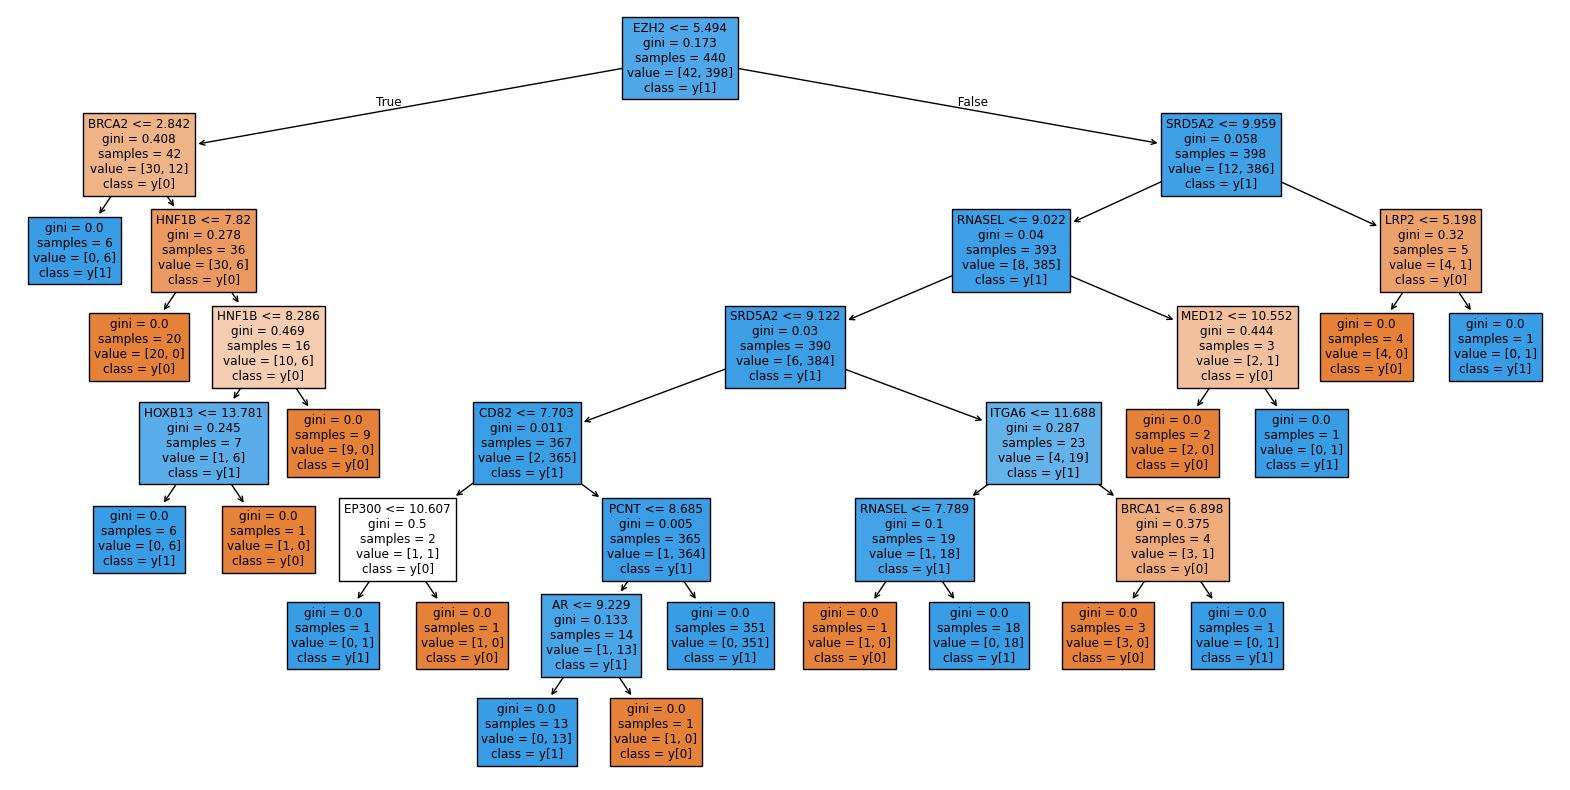

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=True, filled=True)
plt.show()

Evaluate Model

In [6]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9181818181818182


### Part 2

data preprocessing (normalization)

In [8]:
features = df.drop(columns='sample_type_id')
target = df['sample_type_id']


min_max_normalized_df = features.apply(lambda col: (col - col.min()) / (col.max() - col.min()))
print(min_max_normalized_df)

normalized_df = pd.concat([min_max_normalized_df, target], axis=1)

           AR     BRCA1     BRCA2      CD82      CDH1     CHEK2     EHBP1  \
0    0.341713  0.295272  0.458245  0.257529  0.914332  0.452795  0.463093   
1    0.381204  0.101543  0.438517  0.527269  0.896333  0.577031  0.496879   
2    0.722234  0.360661  0.652889  0.483149  0.955357  0.501157  0.510455   
3    0.477818  0.193276  0.343113  0.464642  0.862602  0.534782  0.562631   
4    0.194211  0.149553  0.381106  0.360378  0.904929  0.514214  0.424997   
..        ...       ...       ...       ...       ...       ...       ...   
545  0.497678  0.440303  0.543058  0.540774  0.734332  0.607533  0.412484   
546  0.067885  0.198584  0.151225  0.414002  0.775091  0.596681  0.348915   
547  0.209964  0.252826  0.235380  0.371020  0.771040  0.752227  0.354850   
548  0.201489  0.222668  0.330163  0.589327  0.767679  0.653799  0.188467   
549  0.787426  0.169390  0.580591  0.521525  0.923440  0.556659  0.483947   

        ELAC2     EP300     EPHB2  ...      PTEN    RNASEL    SRD5A2  \
0  

Feature selection (select top 15 features)

In [9]:
import numpy as np

importances = tree.feature_importances_
feature_names = X.columns


top_indices = np.argsort(importances)[::-1][:15]

print("Top 15 features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Top 15 features:
EZH2: 0.4680
HNF1B: 0.1090
SRD5A2: 0.0952
BRCA2: 0.0940
RNASEL: 0.0582
ITGA6: 0.0423
AR: 0.0244
HOXB13: 0.0226
LRP2: 0.0211
BRCA1: 0.0197
MED12: 0.0175
EP300: 0.0132
CD82: 0.0129
PCNT: 0.0018
TGFBR1: 0.0000


Split data 80% training and 20% testing (stratified split)

In [10]:
X = normalized_df.drop(columns=["sample_type_id"])
y = normalized_df["sample_type_id"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Train model

In [11]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

Visualive Tree Model

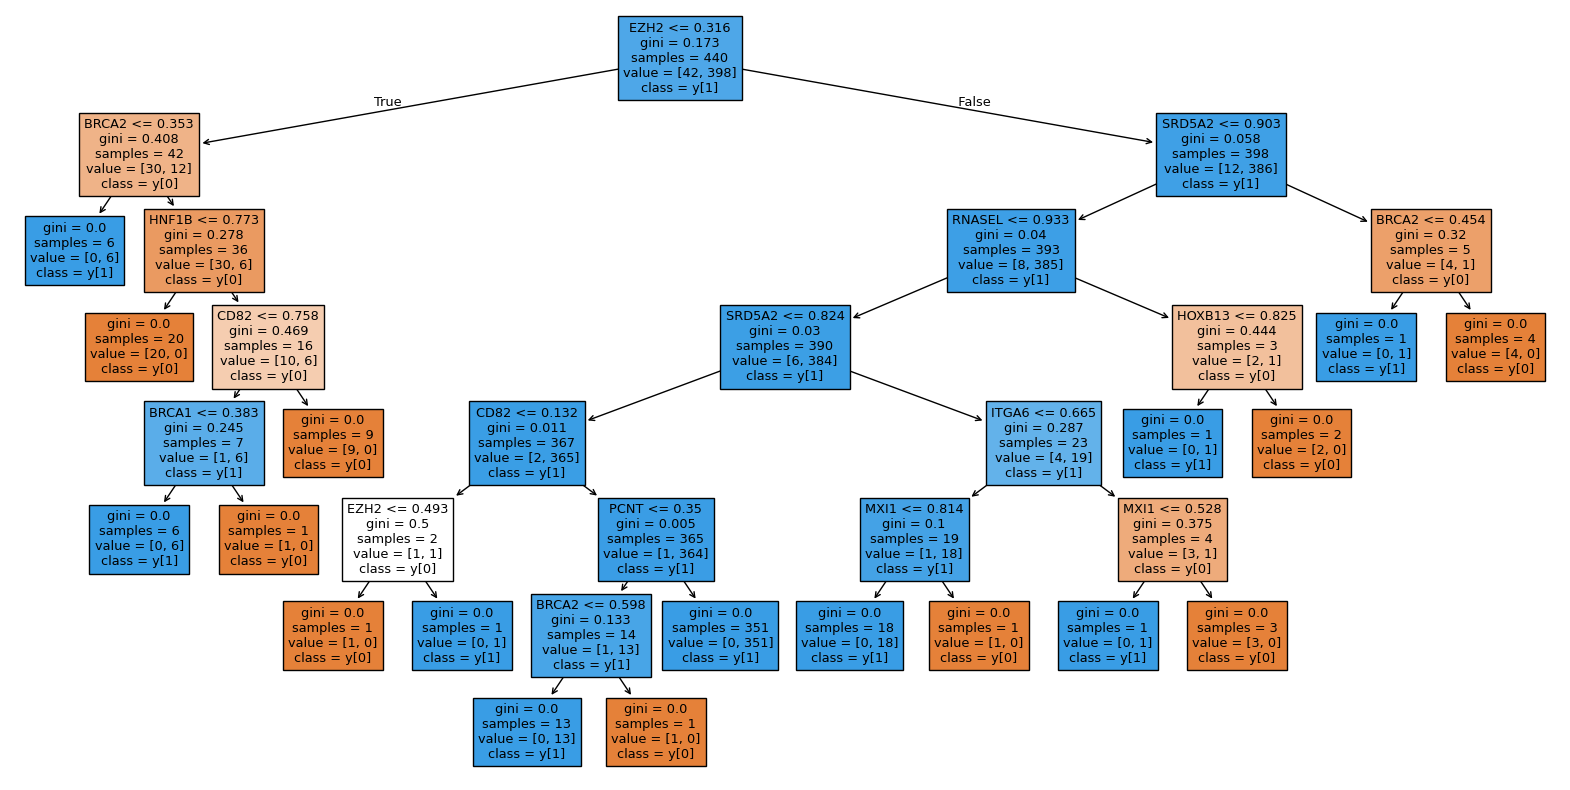

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

Model Evaluation

In [13]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9272727272727272


Confusion Matrix

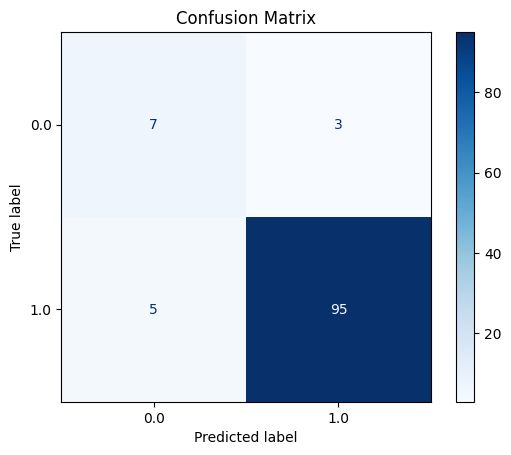

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


ROC Graph and AUC

Group (np.float64(0.0), np.float64(0.0)) has 14 elements inside

Group (np.float64(0.0), np.float64(1.0)) has 6 elements inside

Group (np.float64(1.0), np.float64(0.0)) has 10 elements inside

Group (np.float64(1.0), np.float64(1.0)) has 190 elements inside



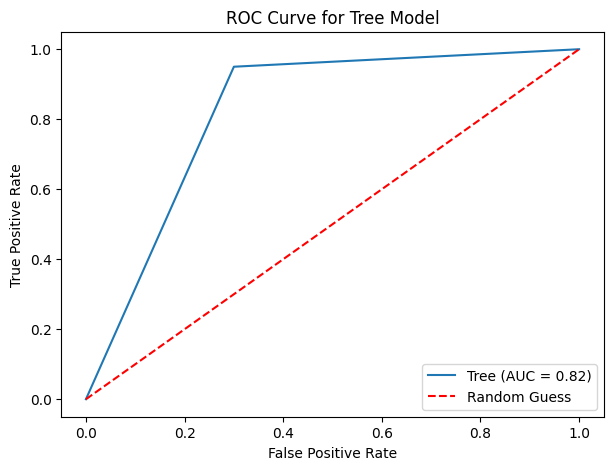

AUC of this ROC Graph is: 0.825


In [15]:
import matplotlib.pyplot as plt_roc
from sklearn.metrics import roc_curve, auc

# Data handling
roc_df = pd.DataFrame(
    {'True': y_test, 'NN': y_pred})
roc_grouped_df = roc_df.groupby(['True', 'NN'])

for name, group in roc_grouped_df:
    print(f"Group {name} has {group.size} elements inside")
    print()

# Graphing ROC curve
plt_roc.figure(figsize=(7, 5))

fpr, tpr, _ = roc_curve(roc_df['True'], roc_df['NN'])
roc_auc = auc(fpr, tpr)
plt_roc.plot(fpr, tpr, label=f'Tree (AUC = {roc_auc:.2f})')

plt_roc.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt_roc.xlabel('False Positive Rate')
plt_roc.ylabel('True Positive Rate')
plt_roc.title('ROC Curve for Tree Model')
plt_roc.legend()
plt_roc.show()

print(f"AUC of this ROC Graph is: {roc_auc}")